In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('pokemon.csv')
df

,name,attack,defense,capture_rate,hp,sp_attack,sp_defense,speed,type
0,Bulbasaur,49,49,45,45,65,65,45,grass
1,Ivysaur,62,63,45,60,80,80,60,grass
2,Venusaur,100,123,45,80,122,120,80,grass
3,Charmander,52,43,45,39,60,50,65,fire
4,Charmeleon,64,58,45,58,80,65,80,fire
...,...,...,...,...,...,...,...,...,...
795,Celesteela,101,103,25,97,107,101,61,steel
796,Kartana,181,131,255,59,59,31,109,grass
797,Guzzlord,101,53,15,223,97,53,43,dark
798,Necrozma,107,101,3,97,127,89,79,psychic


In [4]:
df.head(2).T

,0,1
name,Bulbasaur,Ivysaur
attack,49,62
defense,49,63
capture_rate,45,45
hp,45,60
sp_attack,65,80
sp_defense,65,80
speed,45,60
type,grass,grass


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          800 non-null    object
 1   attack        800 non-null    int64 
 2   defense       800 non-null    int64 
 3   capture_rate  800 non-null    int64 
 4   hp            800 non-null    int64 
 5   sp_attack     800 non-null    int64 
 6   sp_defense    800 non-null    int64 
 7   speed         800 non-null    int64 
 8   type          800 non-null    object
dtypes: int64(7), object(2)
memory usage: 56.4+ KB


In [6]:
df.columns

Index(['name', 'attack', 'defense', 'capture_rate', 'hp', 'sp_attack',
       'sp_defense', 'speed', 'type'],
      dtype='object')

In [7]:
df.isna().sum()

name            0
attack          0
defense         0
capture_rate    0
hp              0
sp_attack       0
sp_defense      0
speed           0
type            0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
attack,800.0,77.83000,32.169391,5.0,55.0,75.0,100.0,185.0
defense,800.0,73.02500,30.784964,5.0,50.0,70.0,90.0,230.0
capture_rate,800.0,98.76125,76.257825,3.0,45.0,60.0,170.0,255.0
hp,800.0,68.97000,26.590749,1.0,50.0,65.0,80.0,255.0
sp_attack,800.0,71.27000,32.358127,10.0,45.0,65.0,91.0,194.0
sp_defense,800.0,70.92500,27.957314,20.0,50.0,66.0,90.0,230.0
speed,800.0,66.26750,28.863295,5.0,45.0,65.0,85.0,180.0


In [12]:
sel_cols = ['name', 'attack', 'defense', 'capture_rate', 'hp', 'sp_attack',
       'sp_defense', 'speed', 'type']

In [13]:
from sklearn.preprocessing import LabelEncoder #1-hot encoder (Categorical --> Binary Hot Encoding)
from sklearn.model_selection import train_test_split #train_test split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score #Crossvalidation

In [14]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    df=pd.concat([df, dummies], axis=1)
    return df

In [47]:
df_final = df[sel_cols]

In [48]:
df_final["type"] = df_final["type"].astype('category')
df_final["type_enc"] = df_final["type"].cat.codes
df_final

,name,attack,defense,capture_rate,hp,sp_attack,sp_defense,speed,type,type_enc
0,Bulbasaur,49,49,45,45,65,65,45,grass,9
1,Ivysaur,62,63,45,60,80,80,60,grass,9
2,Venusaur,100,123,45,80,122,120,80,grass,9
3,Charmander,52,43,45,39,60,50,65,fire,6
4,Charmeleon,64,58,45,58,80,65,80,fire,6
...,...,...,...,...,...,...,...,...,...,...
795,Celesteela,101,103,25,97,107,101,61,steel,16
796,Kartana,181,131,255,59,59,31,109,grass,9
797,Guzzlord,101,53,15,223,97,53,43,dark,1
798,Necrozma,107,101,3,97,127,89,79,psychic,14


In [49]:
df_final.columns

Index(['name', 'attack', 'defense', 'capture_rate', 'hp', 'sp_attack',
       'sp_defense', 'speed', 'type', 'type_enc'],
      dtype='object')

In [50]:
input_vars= ['attack', 'defense', 'capture_rate', 'hp', 'sp_attack',
       'sp_defense', 'speed']

In [51]:
X=df_final[input_vars] #just have the input variables
y=df_final['type_enc'] # have the target variable

In [52]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int8)

In [53]:
df.shape, df_final.shape

((800, 9), (800, 10))

In [54]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.3, random_state=20)

In [55]:
train_X.shape, val_X.shape

((560, 7), (240, 7))

In [56]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(train_X, train_y) #training the model

LinearDiscriminantAnalysis()

In [57]:
pred_values = lda_clf.predict(val_X) #predicting the validation set with the trained model

In [58]:
acc =accuracy_score(val_y,pred_values) #val_y:actual and pred_values: predicted
print('Accuracy of the model is:', acc*100)

Accuracy of the model is: 21.25


In [61]:
cm = confusion_matrix(val_y, pred_values) 

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

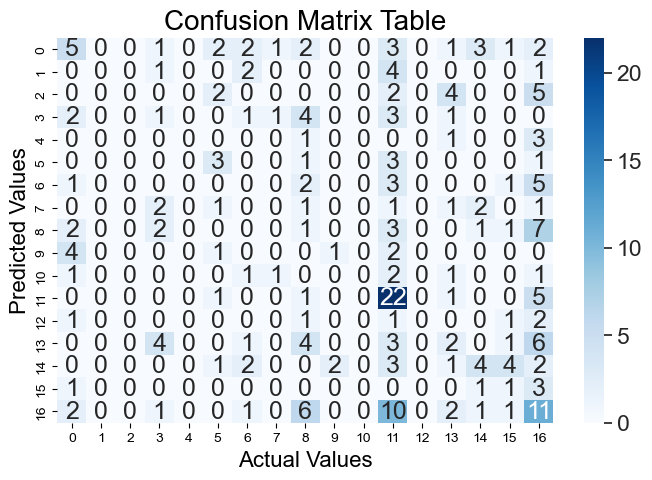

In [63]:
plt.subplots(figsize=(8,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Table', fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

In [64]:
prec = precision_score(val_y, pred_values)
print("Precision for the model is:", prec*100)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].